<h1>MovieLens 1M: Analyzing Ratings and User Demographics</h1>

<h3>Analyze data from the MovieLens 1M dataset, focusing on movies released between 1990 and 2000. This notebook based on <code>movielens_handler.py</code> script logic.</h3>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Create DataFrame from the users table

In [5]:
users = pd.read_table(
    '../datasets/movielens/users.dat',
    sep='::',
    header=None,
    names=['user_id', 'gender', 'age', 'occupation', 'zip'],
    engine='python',
)
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


Create DataFrame from the movies table

In [7]:
movies = pd.read_table(
    '../datasets/movielens/movies.dat',
    sep='::',
    header=None,
    names=['movie_id', 'title', 'genres'],
    engine='python',
)
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


Create DataFrame from the ratings table

In [9]:
ratings = pd.read_table(
    '../datasets/movielens/ratings.dat',
    sep='::',
    header=None,
    names=['user_id', 'movie_id', 'rating', 'timestamp'],
    engine='python',
)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


Merge the three DataFrames into one consolidated DataFrame

In [11]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


Extract the release year from the title and add a new `release_year` column as integer type

In [13]:
data['release_year'] = data['title'].str.extract(r'\((\d{4})\)').astype(int)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,release_year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,1964
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,2000
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy,1989
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War,1992
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama,1995
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama,1982


Filter movies by release year from 1990 to 2000

In [15]:
data = data.loc[(data['release_year'] >= 1990) & (data['release_year'] <= 2000)]
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,release_year
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,2000
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998
10,1,595,5,978824268,F,1,10,48067,Beauty and the Beast (1991),Animation|Children's|Musical,1991
16,1,2687,3,978824268,F,1,10,48067,Tarzan (1999),Animation|Children's,1999
...,...,...,...,...,...,...,...,...,...,...,...
1000196,6040,549,4,956704746,M,25,6,11106,Thirty-Two Short Films About Glenn Gould (1993),Documentary,1993
1000200,6040,2028,5,956704519,M,25,6,11106,Saving Private Ryan (1998),Action|Drama|War,1998
1000202,6040,1089,4,956704996,M,25,6,11106,Reservoir Dogs (1992),Crime|Thriller,1992
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War,1992


Get average movies rating

In [17]:
mean_rating = pd.pivot_table(
    data,
    values='rating',
    index='title',
    columns='gender',
    aggfunc='mean',
).dropna()
mean_rating

gender,F,M
title,,
'Til There Was You (1997),2.675676,2.733333
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1996),3.240000,2.911215
"13th Warrior, The (1999)",3.112000,3.168000
...,...,...
"Young Poisoner's Handbook, The (1995)",4.000000,3.532258
Your Friends and Neighbors (1998),2.888889,3.536585
Zero Effect (1998),3.864407,3.723140


Count the number of ratings for each movie

In [19]:
rating_by_title = data.groupby('title').size()
rating_by_title

title
'Til There Was You (1997)                      52
1-900 (1994)                                    2
10 Things I Hate About You (1999)             700
101 Dalmatians (1996)                         364
13th Warrior, The (1999)                      750
                                             ... 
Your Friends and Neighbors (1998)             109
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 2304, dtype: int64

Select 20 movies with high ratings (at least 500 ratings)

In [21]:
highly_rated_movies = mean_rating.loc[rating_by_title.index[rating_by_title >= 500]].head(20)
highly_rated_movies

gender,F,M
title,,
10 Things I Hate About You (1999),3.646552,3.311966
"13th Warrior, The (1999)",3.112000,3.168000
28 Days (2000),3.209424,2.977707
Ace Ventura: Pet Detective (1994),3.000000,3.197917
"Addams Family, The (1991)",3.186170,3.163498
Air Force One (1997),3.699588,3.555822
Aladdin (1992),3.857143,3.756494
Alien: Resurrection (1997),2.708738,2.997041
Alien³ (1992),3.008264,3.042289


Plotting average ratings by gender

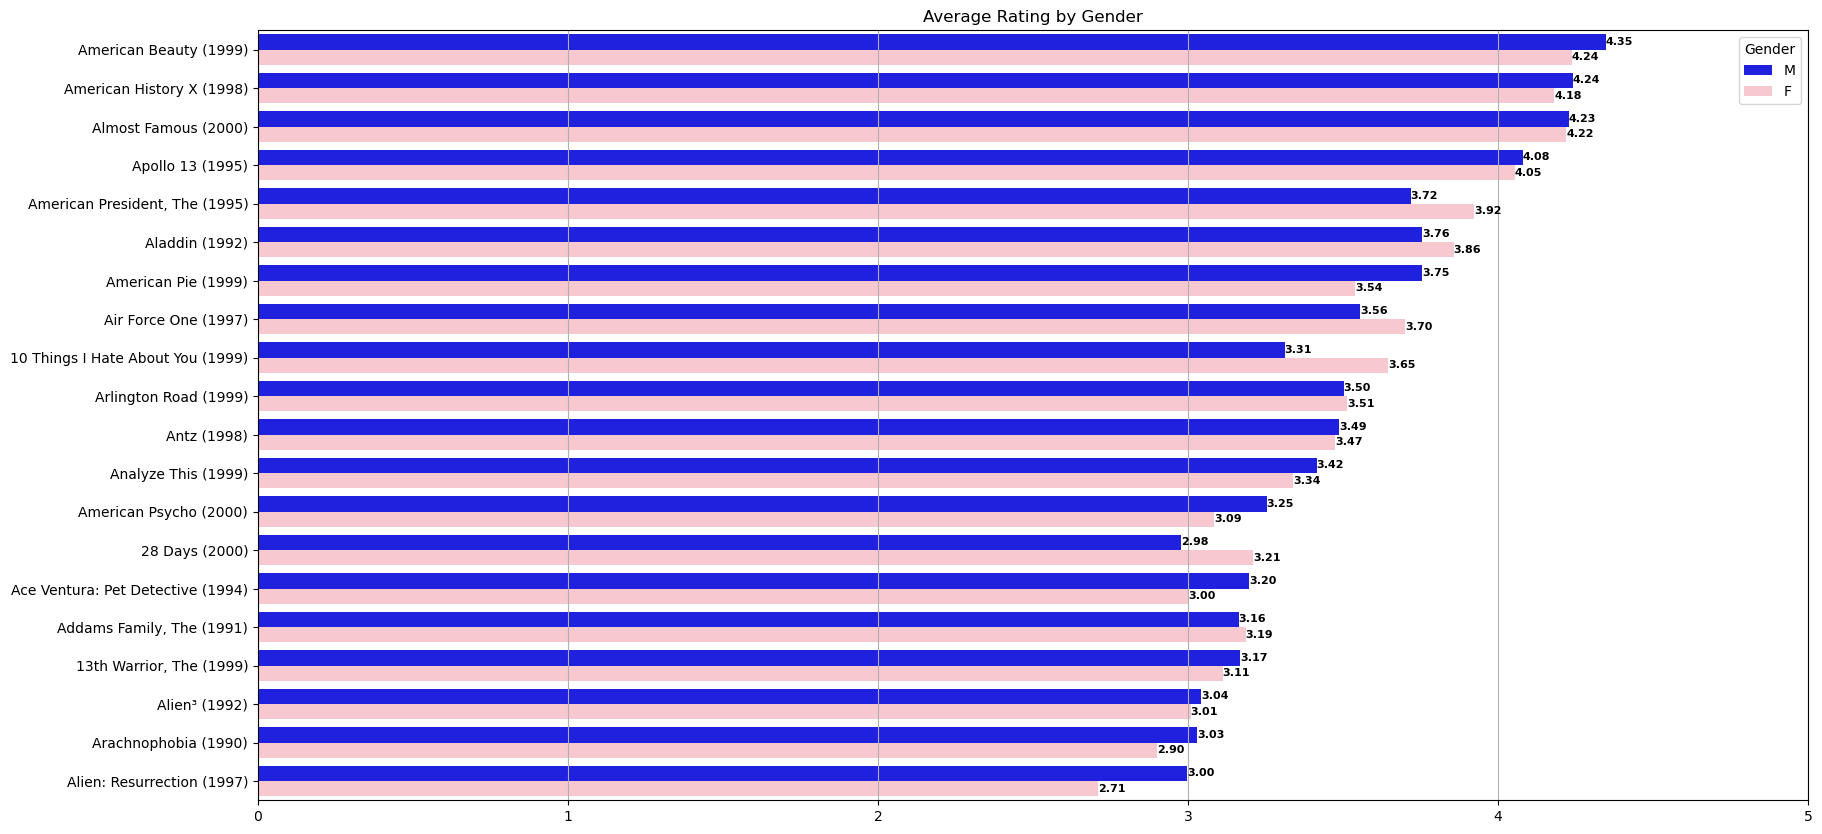

In [23]:
plt.figure(figsize=(20, 10))

# Rearrange data fro plotting
highly_rated_movies = highly_rated_movies.stack()
highly_rated_movies.name = 'rating'
highly_rated_movies = highly_rated_movies.reset_index()

# Sort by highest rating
highly_rated_movies = highly_rated_movies.sort_values(by='rating', ascending=False)

sns.barplot(
    x='rating',
    y='title',
    hue='gender',
    data=highly_rated_movies,
    palette={'F': 'pink', 'M': 'blue'},
)

# Add the final movie rating as plot label
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', fontsize=8, fontweight='bold')

plt.xlim(0, 5)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Average Rating by Gender")

plt.legend(title="Gender")
plt.grid(axis='x')
plt.show()

Get movies titles

In [25]:
movies_titles = highly_rated_movies.reset_index()[['title']]

Filter original DataFrame by movies titles

In [27]:
users_age = data[data['title'].isin(movies_titles['title'])]
users_age

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,release_year
30,1,2294,4,978824291,F,1,10,48067,Antz (1998),Animation|Children's,1998
33,1,588,4,978824268,F,1,10,48067,Aladdin (1992),Animation|Children's|Comedy|Musical,1992
39,1,150,5,978301777,F,1,10,48067,Apollo 13 (1995),Drama,1995
99,2,1690,3,978300051,M,56,16,70072,Alien: Resurrection (1997),Action|Horror|Sci-Fi,1997
105,2,2858,4,978298434,M,56,16,70072,American Beauty (1999),Comedy|Drama,1999
...,...,...,...,...,...,...,...,...,...,...,...
999410,6036,150,4,956712023,F,25,15,32603,Apollo 13 (1995),Drama,1995
999571,6037,2858,4,956709215,F,45,1,76006,American Beauty (1999),Comedy|Drama,1999
999745,6039,588,4,956705950,F,45,0,01060,Aladdin (1992),Animation|Children's|Comedy|Musical,1992
999938,6040,2858,4,956704475,M,25,6,11106,American Beauty (1999),Comedy|Drama,1999


Get users average age

In [29]:
mean_age = pd.pivot_table(
    users_age,
    index='title',
    values='age',
    columns='gender',
    aggfunc='mean',
)
mean_age

gender,F,M
title,,
10 Things I Hate About You (1999),22.879310,23.997863
"13th Warrior, The (1999)",27.008000,27.304000
28 Days (2000),27.104712,28.363057
Ace Ventura: Pet Detective (1994),26.873684,27.597222
"Addams Family, The (1991)",26.957447,28.534221
Air Force One (1997),30.008230,28.876351
Aladdin (1992),26.384075,26.257576
Alien: Resurrection (1997),29.533981,28.359467
Alien³ (1992),29.719008,28.991294


Plotting users average age by gender

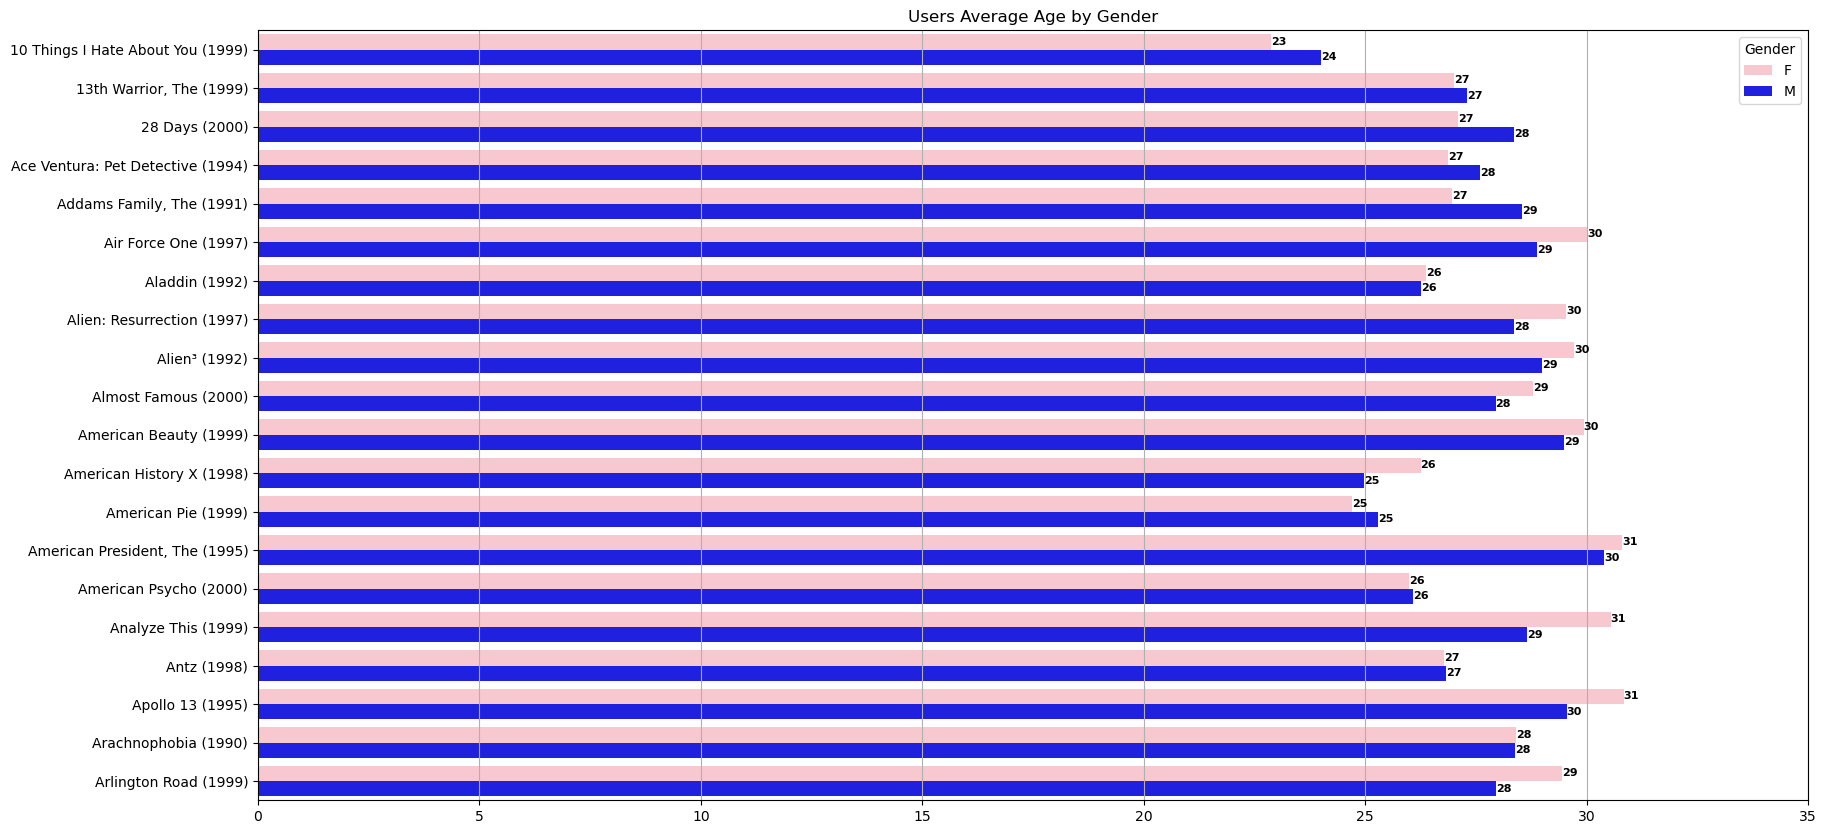

In [31]:
plt.figure(figsize=(20, 10))

# Rearrange data for plotting
mean_age = mean_age.stack()
mean_age.name = 'average_age'
mean_age = mean_age.reset_index()

sns.barplot(
    x='average_age',
    y='title',
    hue='gender',
    data=mean_age,
    palette={'F': 'pink', 'M': 'blue'},
)

# Add average age as plot label
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', fontsize=8, fontweight='bold')

plt.xlim(0, 35)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Users Average Age by Gender")

plt.legend(title="Gender")
plt.grid(axis='x')
plt.show()